# Obliczenia Naukowe
### Labolatoria, Lista 3<br/>Kamil Matejuk, 250135

## Zad 1
*Napisać funkcję rozwiązującą równanie f(x) = 0 metodą bisekcji<br/>
`function mbisekcji(f, a::Float64, b::Float64, delta::Float64, epsilon::Float64)`<br/><br/>
**Dane:**<br/>
`f` – funkcja f(x) zadana jako anonimowa funkcja<br/>
`a`,`b` – końce przedziału początkowego<br/>
`delta`, `epsilon` – dokładności obliczeń<br/>
**Wyniki:**<br/>
`r` – przybliżenie pierwiastka równania f(x) = 0<br/>
`v` – wartość f(r)<br/>
`it` – liczba wykonanych iteracji<br/>
`err` – sygnalizacja błędu*

In [8]:
function mbisekcji(f, a::Float64, b::Float64, delta::Float64, epsilon::Float64)
    maxit = 100000000
    u = f(a)
    v = f(b)
    e = b - a
    if sign(u) == sign(v)
        return (nothing, nothing, 0, 1)
    end
    for k in 1:maxit
        e = e/2
        c = a + e
        w = f(c)
        if abs(e) < delta || abs(w) < epsilon
            return (c, w, k, 0)
        end
        if sign(u) != sign(w)
            b = c
            v = w
        else
            a = c
            u = w
        end
    end     
    return (nothing, nothing, maxit, 1)
end

mbisekcji (generic function with 1 method)

**Omówienie**<br/>
Metoda bisekcji wymaga przedziału początkowego o końcach o przeciwych znakach. Korzysta z rekurencyjnych podziałów na dwa, wybierając środkowy pkt jako nowy koniec przedziału, pamiętając by spełniać warunki początkowe końców przedziałów.<br/>
Złożoność $ O\big( log(\frac{b-a}{delta}) \big) $

#### Program testujący

In [2]:
function f(x)
    return (x - 1) * (x + 1) * (x + 3)
end
mbisekcji(f, -5.0, 40.0, 10e-7, 10e-7)

(1.000000312924385, 2.5033956680964614e-6, 26, 0)

## Zad 2
*Napisać funkcję rozwiązującą równanie f(x) = 0 metodą Newtona<br/>
`function mstycznych(f, pf, x0::Float64, delta::Float64, epsilon::Float64, maxit::Int)`<br/><br/>
**Dane:**<br/>
`f`, `pf` - funkcją f(x) oraz pochodną f'(x) zadane jako anonimowe funkcje<br/>
`x0` – przybliżenie początkowe<br/>
`delta`,`epsilon` – dokładności obliczeń<br/>
`maxit` – maksymalna dopuszczalna liczba iteracji<br/>
**Wyniki:**<br/>
`r` – przybliżenie pierwiastka równania f(x) = 0<br/>
`v` – wartość f(r)<br/>
`it` – liczba wykonanych iteracji<br/>
`err` – sygnalizacja błędu*

In [9]:
function mstycznych(f,pf,x0::Float64, delta::Float64, epsilon::Float64, maxit::Int)
    v = f(x0)
    if abs(v) < epsilon
        return (x0, v, 0, 0)
    end
    for k in 1:maxit
        if pf(x0) == 0
            return (nothing, nothing, k, 2)
        end
        x1 = x0 - v/pf(x0)
        if isinf(x1)
            return (nothing, nothing, k, 2)
        end
        v = f(x1)
        if abs(x1 - x0) < delta || abs(v) < epsilon
            return (x1, v, k, 0)
        end
        x0 = x1
    end
    return (nothing, nothing, maxit, 1)
end

mstycznych (generic function with 1 method)

**Omówienie**<br/>
Metoda korzysta z pochodnej w punkcie, rekurencyjnie wybierając punkt początkowy jako przecięcie stycznej z osią OX. Metoda szybsza od bisekcji, ale trzeba dobrać tak pkt początkowy żeby nie było możliwości pochodnej równej zero

#### Program testujący

In [4]:
function f(x)
    return (x - 1) * (x + 1) * (x + 3)
end
function pf(x)
    return x^3 + 3 * x^2 - x - 3
end
mstycznych(f, pf, 2.0, 10e-7, 10e-7, 1000)

(1.0, 0.0, 1, 0)

## Zad 3
*Napisać funkcję rozwiązującą równanie f(x) = 0 metodą siecznych<br/>
`function msiecznych(f, x0::Float64, x1::Float64, delta::Float64, epsilon::Float64, maxit::Int)`<br/><br/>
**Dane:**<br/>
`f` – funkcja f(x) zadana jako anonimowa funkcja<br/>
`x0`,`x1` – przybliżenia początkowe<br/>
`delta`, `epsilon` – dokładności obliczeń<br/>
`maxit` – maksymalna dopuszczalna liczba iteracji<br/>
**Wyniki:**<br/>
`r` – przybliżenie pierwiastka równania f(x) = 0<br/>
`v` – wartość f(r)<br/>
`it` – liczba wykonanych iteracji<br/>
`err` – sygnalizacja błędu*

In [10]:
function msiecznych(f, x0::Float64, x1::Float64, delta::Float64, epsilon::Float64, maxit::Int)
    fa = f(x0)
    fb = f(x1)
    for k in 1:maxit
        if abs(fa) > abs(fb)
            temp = x0
            x0 = x1
            x0 = temp
            fa = f(x0)
            fb = f(x1)
        end
        s = (x1 - x0)/(fb - fa)
        x1 = x0
        fb = fa
        x0 = x0 - fa * s
        fa = f(x0)
        if abs(x1 - x0) < delta || abs(fa) < epsilon
            return (x0, fa, k, 0)
        end
    end
    return (nothing, nothing, maxit, 1)
end

msiecznych (generic function with 1 method)

**Omówienie**<br/>
Metoda podobnie jak metoda newtona, korzysta z przecięcia prostej z osią OX, jednak zamiast stycznej do wykresu korzysta z siecznej dwóch punktów. Eliminuje to problem z pochodną równą 0, ale kosztem czasu operacji.

#### Program testujący

In [6]:
function f(x)
    return (x - 1) * (x + 1) * (x + 3)
end
msiecznych(f, -5.0, 40.0, 10e-7, 10e-7, 1000)

(-3.000000000152954, -1.2236327508201958e-9, 9, 0)

## Zad 4
*W celu wyznaczenia pierwiastka równania $ sin x − (\frac{x}{2})^2 = 0 $ zastosować wcześniej zaprogramowane metody.*

In [7]:
# funkcja
function f4(x)
    return sin(x) - (x/2)^2
end
# pochodna
function pf4(x)
    return cos(x) - (x/2)
end

pf4 (generic function with 1 method)

### 4.1
Metoda bisekcji z przedziałem początkowym $[1\frac{1}{2}, 2]$ i $\delta = \frac{1}{2}10^{-5}$, $\epsilon = \frac{1}{2}10^{-5}$

In [8]:
mbisekcji(f4, 1.5, 2.0, 5e-6, 5e-6)

(1.9337539672851562, -2.7027680138402843e-7, 16, 0)

### 4.2
Metoda Newtona z przybliżeniem początkowym $x_0 = 1.5$, $\delta = \frac{1}{2}10^{-5}$, $\epsilon = \frac{1}{2}10^{-5}$

In [9]:
mstycznych(f4, pf4, 1.5, 5e-6, 5e-6, 1000)

(1.933753779789742, -2.2423316314856834e-8, 4, 0)

### 4.3
Metoda siecznych z przybliżeniami początkowym $x_0 = 1$, $x_1 = 2$, $\delta = \frac{1}{2}10^{-5}$, $\epsilon = \frac{1}{2}10^{-5}$

In [10]:
msiecznych(f4, 1.0, 2.0, 5e-6, 5e-6, 1000)

(1.9337539405015145, -2.3487103129049558e-7, 5, 0)

Każda z zaprogramowanych metod (bisekcji, stycznych i siecznych) zwróciła bardzo podobny winik - różnią się 7 miejscu po przecinku. Najbardziej dokładna była metoda stycznych, po niej siecznych i na końcu bisekcji.<br/>
Należy zwrócić uwagę na czasy trwania każdej z metod. Najkrócej trwała metoda stycznych, tylko 4 iteracje. Bardzo podobnie zadziałała metoda siecznych, jedną iterację dłużej. Natomaist metoda bisekcji trwała 4 razy dłużej niż stycznych - aż 16 iteracji.<br/>
Jak widać, dla tak dobranych danych, najdokładniejszy wynik i w najkrótszym czasie został znaleziony przez metodę Newtona.

## Zad 5
Metodą bisekcji znaleźć wartości zmiennej x, dla której przecinają się wykresy funkcji $y = 3x$ i $y = e^x$. Wymagana dokładność obliczeń: $\delta = 10^{−4}$, $\epsilon = 10^{-4}$.

In [6]:
function f5(x)
    return 3*x - exp(x)
end
println("Zły   przedział początkowy: ", mbisekcji(f5, -10.0, 10.0, 1e-4, 1e-4))
println("Dobry przedział początkowy: ", mbisekcji(f5, -1.0, 1.0, 1e-4, 1e-4))
println("Dobry przedział początkowy: ", mbisekcji(f5, 1.0, 2.0, 1e-4, 1e-4))

Zły   przedział początkowy: (nothing, nothing, 0, 1)
Dobry przedział początkowy: (0.619140625, 9.066320343276146e-5, 10, 0)
Dobry przedział początkowy: (1.5120849609375, 7.618578602741621e-5, 13, 0)


W tym zadaniu problemem jest dobór przedziału poczatkowego, tak aby końce przedziału miały przeciwne znaki i dało się zastosować metodę bisekcji.<br/>
Sprawdzana funkcja jest parabolą, z miejsami zerowymi równymi około 0.619 i 1.512. Aby metoda bisekcji zadziałała, jedna z granic przedziału musi się znajdować w zakresie $(0.619, 1.512)$, a druga poza nim.<br/>
Poniższy wykres przedstawia naszą badaną funckję:

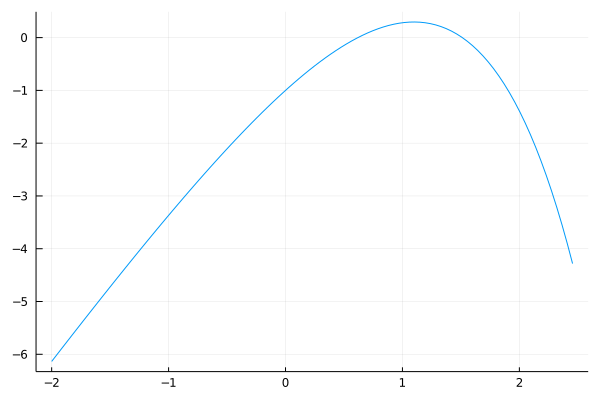

In [5]:
using Plots
x = [i*4.5/100-2 for i in 0:99]
y = [f5(xi) for xi in x]
plot(x, y, legend=false)

Zatem dla tych konkretnych funkcji metoda ta jest dobra jedynie, kiedy znane jest przybliżone miejsce zerowe, a celem jest jedynie znalezienie dokładniejszej wartości.

## Zad 6
### 6.1
Znaleźć miejsce zerowe funkcji $f_1(x) = e^{1−x}−1$ oraz $f_2(x) = xe^{−x}$ za pomocą metod bisekcji, Newtona i siecznych. Wymagane dokładności obliczeń: $\delta = \frac{1}{2}10^{-5}$, $\epsilon = \frac{1}{2}10^{-5}$. Dobrać odpowiednio przedział i przybliżenia początkowe.

In [13]:
using Printf

# pierwsza funkcja
function f6_1(x)
    return exp(1 - x) - 1
end
# pochodna pierwszej funkcji
function pf6_1(x)
    return - exp(1 - x)
end
# druga funkcja
function f6_2(x)
    return x * exp(-x)
end
# pochodna pierwszej funkcji
function pf6_2(x)
    return - exp(-x) * (x - 1)
end

delta = 5e-6
epsilon = 5e-6
maxit = 10000

r, v, it, err = mbisekcji(f6_1, -2.0, 1.0, delta, epsilon)
println("Metoda bisekcji:  f1($r) = $v")
r, v, it, err = mstycznych(f6_1, pf6_1, 0.5, delta, epsilon, maxit)
println("Metoda Newtona:   f1($r) = $v")
r, v, it, err = msiecznych(f6_1, -2.0, 2.0, delta, epsilon, maxit)
println("Metoda siecznych: f1($r) = $v")
println()
r, v, it, err = mbisekcji(f6_2, -2.0, 1.0, delta, epsilon)
println("Metoda bisekcji:  f2($r) = $v")
r, v, it, err = mstycznych(f6_2, pf6_2, 0.5, delta, epsilon, maxit)
println("Metoda Newtona:   f2($r) = $v")
r, v, it, err = msiecznych(f6_2, -2.0, -1.0, delta, epsilon, maxit)
println("Metoda siecznych: f2($r) = $v")

Metoda bisekcji:  f1(0.9999971389770508) = 2.861027041944908e-6
Metoda Newtona:   f1(0.9999999998878352) = 1.1216494399945987e-10
Metoda siecznych: f1(1.0000000903514241) = -9.035142001234675e-8

Metoda bisekcji:  f2(3.814697265625e-6) = 3.814682713737527e-6
Metoda Newtona:   f2(-3.0642493416461764e-7) = -3.0642502806087233e-7
Metoda siecznych: f2(-2.630161874190613e-7) = -2.630162565965852e-7


Funkcja $f_1$ ma miejsce zerowe w $x_0 = 1$. Każda metoda zwróciła wynik w poprawnym otoczeniu dla zadanej dokładności i zadanych przedziałów, z czego najdokładnieszy wynik został uzyskany metodą Newtona.<br/>
Funkcja $f_2$ ma miejsce zerowe w $x_0 = 0$, natomiast przy $x \rightarrow \infty$ $f_2(x) \rightarrow 0$, zatem dla zadanej dokładności, można uznać drugie miesce zerowe za każdą wartość $x \in (15, \infty)$. Tym razem  największą dokładność osiągnęła metoda siecznych, ale wynika to tylko z doboru przedziału początkowego.

### 6.2
Sprawdzić co stanie, gdy w metodzie Newtona dla $f_1$ wybierzemy $x_0 \in (1, \infty ]$ a dla $f_2$ wybierzemy $x_0 > 1$. Czy mogę wybrać $x_0 = 1$ dla $f_2$?

In [57]:
r, v, it, err = mstycznych(f6_1, pf6_1, 1.5, delta, epsilon, maxit)
println("x0 = 1.5, f1($r) = $v, err = $err")
r, v, it, err = mstycznych(f6_1, pf6_1, 7.5, delta, epsilon, maxit)
println("x0 = 7.5, f1($r) = $v, err = $err")
r, v, it, err = mstycznych(f6_1, pf6_1, 7.6, delta, epsilon, maxit)
println("x0 = 7.6, f1($r) = $v, err = $err\n")

r, v, it, err = mstycznych(f6_2, pf6_2, 1.5, delta, epsilon, maxit)
println("x0 > 1, f2($r) = $v, err = $err")
r, v, it, err = mstycznych(f6_2, pf6_2, 1.0, delta, epsilon, maxit)
println("x0 = 1, f2($r) = $v, err = $err")

x0 = 1.5, f1(0.9999999984736215) = 1.5263785790864404e-9, err = 0
x0 = 7.5, f1(0.9999994332744109) = 5.667257496622113e-7, err = 0
x0 = 7.6, f1(nothing) = nothing, err = 1

x0 > 1, f2(15.85996660038479) = 2.0530819776075742e-6, err = 0
x0 = 1, f2(nothing) = nothing, err = 2


**funkcja 1**<br/>
Dla stanów poczatkowych $x_0 > 1$ funkcja 1 osiagnęła prawidłowy wynik, jednak już przy $x_0 > 7.5$ zwróciła błąd, ponieważ pochodna dąży do zera.<br/>

**funkcja 2**<br/>
otrzymuje pozorne miejsce zerowe (wartość mieści się w zakresie delta) dla $x_0 > 1$. Dla $f_2$ nie można przyjąć $x_0 = 1$, ponieważ w tym punkcie styczna do wykresu jest idealnie poziomo (pochodna bliska 0) i nie przecina się z osią OX, więc nie pozwala na wygenerowanie kolejnego punktu metody.